In [1]:
from mobilib import Trajectory
from mobilib import constants
import pandas as pd
import numpy as np
import mobilib
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('./test.csv')
test = test[test['id'].isin(test['id'].unique()[0:5])]

In [3]:
traj = Trajectory(df=test, x='x', y='y', t='datetime', is_latlng=True, uid='id')

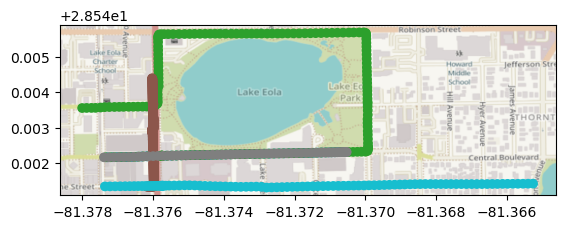

In [4]:
mobilib.image.plot(traj, ax=traj.gdf.plot(column=constants.UID))

### Moving Together - Encounter

In [5]:
encounter_pattern = mobilib.moving_together.Encounter(3, 0.005)
traj = encounter_pattern.run(traj)
traj.gdf[constants.ENCOUNTER].unique()

array(['', ' 1 2 3 4 5'], dtype=object)

<Axes: >

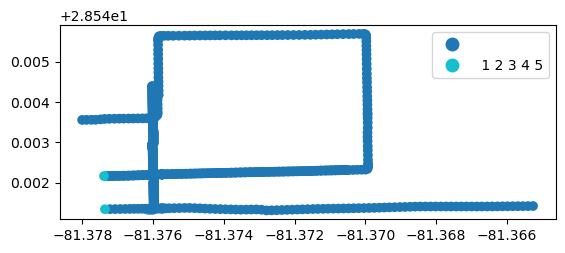

In [6]:
traj.gdf.plot(column='encounter', legend=True)

### Sequential Pattern - PrefixSpan

<Axes: >

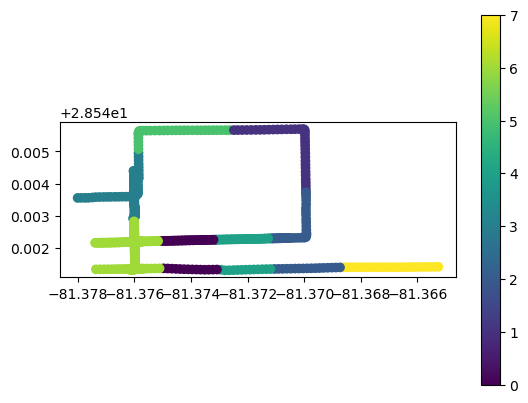

In [7]:
cluster = mobilib.clutering.KMeans()
clustered_traj = cluster.k_means(traj)
clustered_traj.gdf.plot(column=constants.CLUSTER, legend=True)

In [8]:
uids, seqs = mobilib.sequential.cluster_sequences(clustered_traj)
list(zip(uids, seqs))

[('bus0', [2, 4, 0, 6]),
 ('moto0', [3, 5, 1, 2, 4, 0, 6]),
 ('ped0', [3, 6]),
 ('truck0', [2, 4, 0, 6]),
 ('truck1', [7, 2, 4, 0, 6])]

In [9]:
ps = mobilib.sequential.PrefixSpan(3)
for i in ps.prefix_span([], seqs):
    print(i)

([6], 5)
([2], 4)
([2, 4], 4)
([2, 4, 0], 4)
([2, 4, 0, 6], 4)
([2, 4, 6], 4)
([2, 0], 4)
([2, 0, 6], 4)
([2, 6], 4)
([4], 4)
([4, 0], 4)
([4, 0, 6], 4)
([4, 6], 4)
([0], 4)
([0, 6], 4)


### Periodic Pattern

In [10]:
test = pd.read_csv('./geolife_sample.csv')
test = test[test['uid'].isin(test['uid'].unique()[0:1])]
traj = Trajectory(df=test, x='lng', y='lat', t='datetime', is_latlng=True, uid='uid')

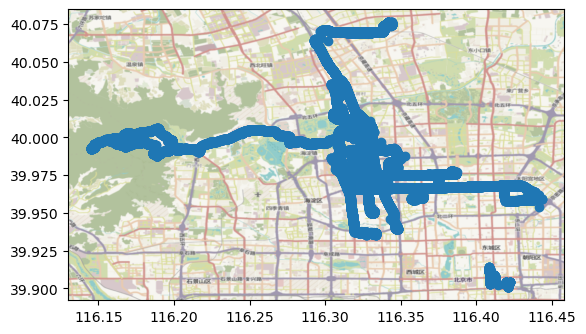

In [11]:
mobilib.image.plot(traj, ax=traj.gdf.plot())

In [12]:
cluster = mobilib.clutering.KMeans(n_clusters=5)
t_clustered = cluster.k_means(traj)

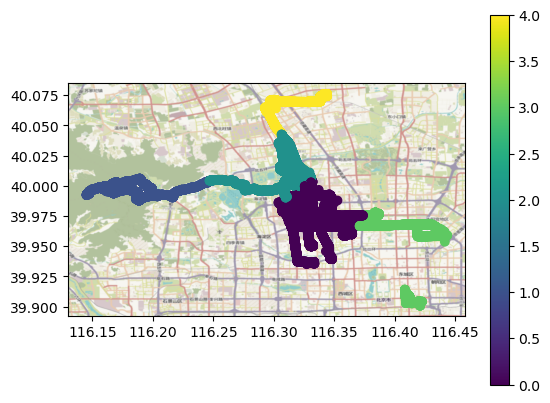

In [13]:
ax = t_clustered.gdf.plot(column=constants.CLUSTER, legend=True)
mobilib.image.plot(traj, ax=ax)

<Axes: >

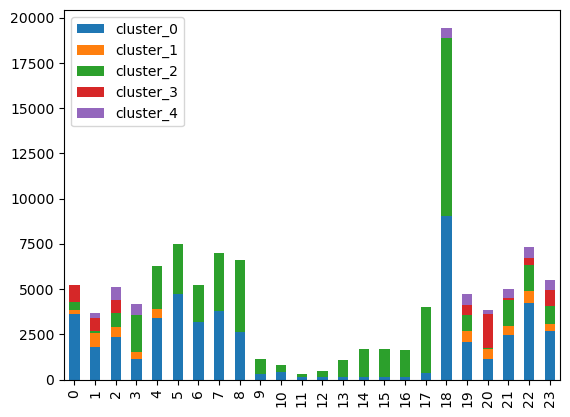

In [15]:
period = mobilib.periodic.Periodic()
p = period.periodic(t_clustered)
p.plot.bar(stacked=True)